In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors
from matplotlib.patches import Patch
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import config
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib
import os
import cmaps
import salem
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from pylab import rcParams
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from myfunc import timer
from myfunc import DirMan
import config
import matplotlib.font_manager as fm

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera04/zhwei/xionghui/bedrock/run/{resolution}/'
post_data_path = '/tera04/zhwei/xionghui/bedrock/'
shp_path = '/tera04/zhwei/xionghui/bedrock/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'

if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

pd.set_option('display.max_columns', None)
# font = {'family': 'Times New Roman'}
font = {'family': 'Arial'}
matplotlib.rc('font', **font)
font_properties = fm.FontProperties(weight='bold')

print(data_path)
shp = gpd.GeoDataFrame.from_file(shp_path+'World_CN/ne_10m_admin_0_countries_chn.shp')


/tera04/zhwei/xionghui/bedrock/run/500/


In [2]:
df = pd.read_csv(f'{data_path}csv/site.csv')
df2 = df.copy()
df2

,Unnamed: 0,lat,lon,Measure,Citation,Sbedrock_field_min,Sbedrock_field_max,Sbedrock,Ssoil,Soil_depth,DTB,mask1,mask2,mask3,mask4,mask,num
0,0,-34.300000,19.150000,N,"Lamont, 1984",NaN,NaN,147.998800,207.69398,60.0,599.06116,NaN,1.0,NaN,NaN,NaN,0
1,1,-32.338300,116.090400,N,"Dell, 1983",NaN,NaN,300.742430,75.00501,NaN,100.00000,1.0,1.0,NaN,1.0,NaN,1
2,2,-30.412800,18.249700,N,"Carrick, 2003",NaN,NaN,67.932980,69.47595,0.3,100.00000,1.0,1.0,NaN,NaN,NaN,2
3,3,11.730000,76.450000,Y,"Ruiz, 2010",NaN,NaN,199.571170,98.55951,NaN,100.00000,1.0,1.0,1.0,1.0,1.0,3
4,4,20.815556,-89.245000,Y,Querejeta 2007,NaN,NaN,160.841100,233.31688,30.0,5000.00000,NaN,0.0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,46.000000,4.500000,N,"Curt, 2001",NaN,NaN,99.661840,96.76730,112.0,100.00000,1.0,1.0,1.0,1.0,1.0,75
76,76,48.666111,14.707778,N,"Samonil, 2020",NaN,NaN,-11.301448,110.73007,75.0,100.00000,1.0,1.0,1.0,NaN,NaN,76
77,77,48.978611,13.811944,N,"Samonil, 2020",NaN,NaN,-30.491331,115.84006,64.0,100.00000,1.0,1.0,1.0,NaN,NaN,77
78,78,49.359722,18.383333,N,"Samonil, 2020",NaN,NaN,-15.303252,111.81714,72.0,100.00000,1.0,1.0,1.0,NaN,NaN,78


In [7]:
def draw(name,cmap,level):
    fig = plt.figure(figsize=(12, 6), dpi=500)

    fig.subplots_adjust(left=0.05, right=0.98, 
                    bottom=0.14, top=0.95, hspace=0.25) 
        
    #Create a subgraph grid with 2 rows and 3 columns
    gs = GridSpec(2, 6)
    ax = fig.add_subplot(gs[:, :], projection=ccrs.PlateCarree())

    for spine in ax.spines.values():
        spine.set_edgecolor('white')  
        spine.set_linewidth(0)  

    ax.set_xlim(region[0], region[1])
    ax.set_ylim(region[2], region[3])

    # coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='0.6', facecolor='none')
    rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m', edgecolor='0.6', facecolor='none')
    ax.add_feature(cfeature.LAND, facecolor='0.95')
    # ax.add_feature(coastline, linewidth=0.6)
    ax.add_feature(cfeature.LAKES, alpha=1, facecolor='white', edgecolor='white')
    ax.add_feature(rivers, linewidth=0.8)
    # ax.gridlines(draw_labels=False, linestyle=':', linewidth=0.7, color='grey', alpha=0.8)

    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent(region)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    if name[2] == 'Sb_field':
        df3 = df2[(df2['Sbedrock_field_min'] > 0)] 
        df3 = df3.sort_values(by=['lon']).reset_index(drop=True)
        print(df3)
        ax.scatter(df3['lon'], df3['lat'], marker='o',
                        s=100, linewidths=1, edgecolors="black", facecolors="#c69c73", zorder=3)
        
        for i, row in df3.iterrows():
            if i == 10:
                ax.text(row['lon'] + 1, row['lat'] + 2, f'{i+1}', ha='center', va='bottom', fontsize=32, fontweight='bold')

        # ax.legend(fontsize=14, bbox_to_anchor=(-0.0145, 0.005), loc='lower left')
    # elif name[2] == 'DTB_field':
    #     df3 = df2[(df2['Field'] > 0)] 
    #     df3 = df3.sort_values(by=['lon']).reset_index(drop=True)
    #     print(df3)
    #     ax.scatter(df3['lon'], df3['lat'], marker='o',
    #                     s=20, linewidths=1, edgecolors="black", facecolors="black", zorder=2)
    # fig.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig(f"../fig/all/fig5_4.eps",dpi=500, bbox_inches='tight')
    plt.show()


    Unnamed: 0      lat       lon Measure                  Citation  \
0           59  39.7273 -123.6433       Y  Rempe and Dietrich, 2018   
1           56  39.5745 -123.4770       Y                Hahm, 2020   
2           54  39.1530 -122.3480       Y                Hahm, 2022   
3           47  37.0879 -119.2505       Y              O'Geen, 2018   
4           44  35.9570 -118.6300       Y             Hubbert 2001b   
5           34  33.4517 -117.1735       Y            Bornyasz, 2005   
6           38  33.8100 -116.6800       Y           Sternberg, 1996   
7           61  40.0280 -105.4880       Y               Burns, 2022   
8           12  29.8500  -98.4900       Y    McCole and Stern, 2007   
9           15  29.9400  -98.1200       Y          Schwinning, 2008   
10          48  37.2170  120.6000       Y                Wang, 2023   

    Sbedrock_field_min  Sbedrock_field_max    Sbedrock       Ssoil  \
0                140.0               420.0  315.155980  105.187485   
1      

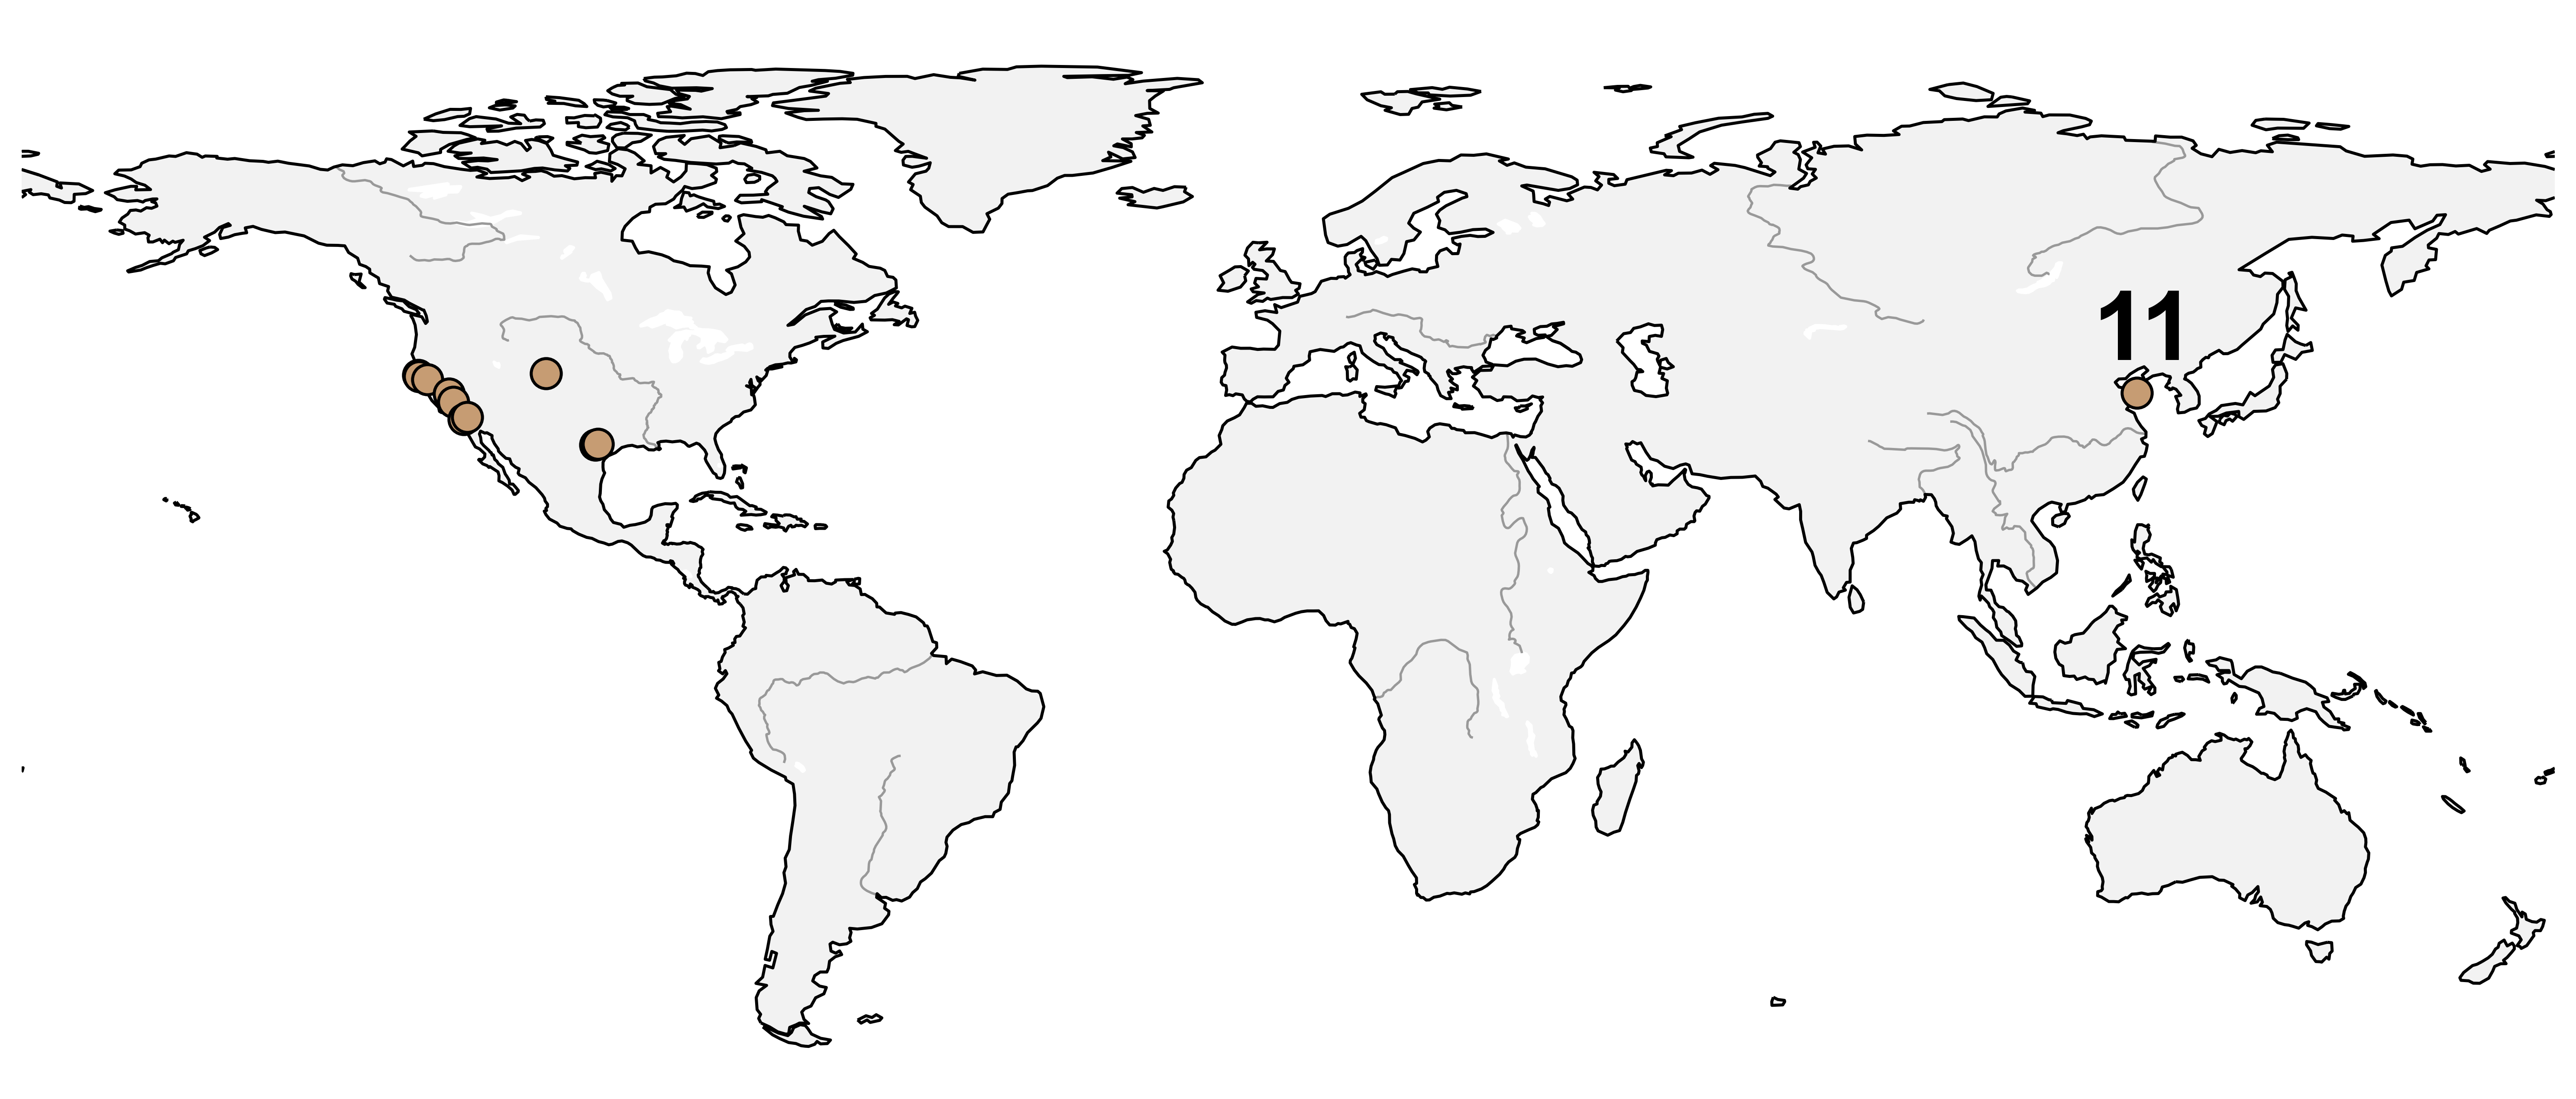

In [8]:
region = [-180,180,-60,90]
rgb_list = ['#606060','#8ec0cb','#00CC66','#66CC00',
                                '#69aa4c','#CCCC00','#ebc874','#99004C','#FF6666']
cmap1 = colors.ListedColormap(rgb_list)
name = ['Sbedrock', 'Sbedrock', 'Sb_field', '$S_{{bedrock}}$ (mm)']
level = np.arange(0,500,50)
cmap = cmap1
draw(name,level,cmap)

In [ ]:
def draw2(region,name,cmap,level):
    fig = plt.figure(figsize=(12, 6), dpi=500)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())
    
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(3)  

    ax.set_xlim(region[0], region[1])
    ax.set_ylim(region[2], region[3])

    # coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='0.6', facecolor='none')
    rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m', edgecolor='0.6', facecolor='none')
    ax.add_feature(cfeature.LAND, facecolor='0.95')
    # ax.add_feature(coastline, linewidth=0.6)
    ax.add_feature(cfeature.LAKES, alpha=1, facecolor='white', edgecolor='white')
    ax.add_feature(rivers, linewidth=0.8)
    # ax.gridlines(draw_labels=False, linestyle=':', linewidth=0.7, color='grey', alpha=0.8)

    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent(region, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    if name[2] == 'Sb_field':
        df3 = df2[(df2['Sbedrock_field_min'] > 0)] 
        df3 = df3.sort_values(by=['lon']).reset_index(drop=True)
        # print(df3)
        ax.scatter(df3['lon'][:-1], df3['lat'][:-1], marker='o',
                        s=300, linewidths=2, edgecolors="black", facecolors="#c69c73", zorder=3)
        
        lon_plus=[-0.2, 0.5, 1, -0.5, 1, -1, 1, 1, -1, 1]
        lat_plus=[ 0.5, 0.3, 0,  0.2, 0,  -3, 0.4, 0.4, 0, 0.6]
        for i, row in df3[:-1].iterrows():
            ax.text(row['lon'] + lon_plus[i], row['lat'] + lat_plus[i], f'{i+1}', ha='center', va='bottom', fontsize=40, fontweight='bold')

        # ax.legend(fontsize=14, bbox_to_anchor=(-0.0145, 0.005), loc='lower left')
    elif name[2] == 'DTB_field':
        df3 = df2[(df2['Field'] > 0)] 
        df3 = df3.sort_values(by=['lon']).reset_index(drop=True)
        print(df3)
        ax.scatter(df3['lon'], df3['lat'], marker='o',
                        s=20, linewidths=1, edgecolors="black", facecolors="black", zorder=2)
    # fig.patch.set_alpha(0)

    plt.savefig(f"../fig/all/fig5_3.png",dpi=500, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

region = [-124.8,-86.95,28.5,44.4]
draw2(region,name,level,cmap)
